In [1]:
# IMPORTANDO BIBLIOTECAS
import pandas as pd
import numpy as np
import seaborn as sns
#sns.set()
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import spearmanr
import warnings
warnings.filterwarnings('ignore')





In [2]:
# nome do arquivo
DB = 'DataBase_Full.txt' 
DB_T = 'DataBase_Full_TranspostosMF.txt' 

df_DB = pd.read_csv(DB,skiprows=0, delimiter=';') 
df_DB_T = pd.read_csv(DB_T,skiprows=0, delimiter=';') 

In [ ]:
df_DB.head(3)

In [ ]:
df_DB_T.head(3)

# 1. Analise de distribuição dos dados
##### 
##### * Os dados de módulo e fase não tem uma distribuição normal.

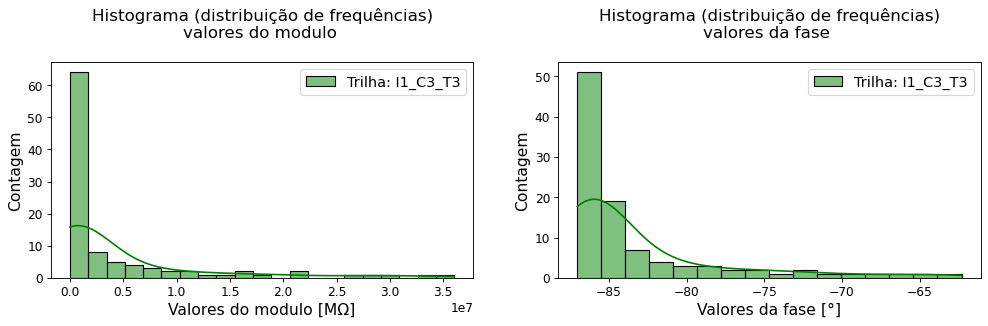

In [113]:
# Filtrando dados de uma medição de trilha
df_I1_C3_T3 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query('Id_Trilha=="I1_C3_T3" ')

# Criar o histograma com curva de densidade estimada
plt.figure(figsize=(15,3.5), dpi= 80)
#====
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['xtick.labelsize'] = 11
#sns.set_style("whitegrid")
plt.subplot(1, 2, 1)
sns.histplot(df_I1_C3_T3['absz'] , color="green", label="Trilha: I1_C3_T3", kde=True)
plt.title('Histograma (distribuição de frequências)\nvalores do modulo \n',fontsize=15)
plt.xlabel('Valores do modulo [MΩ]',fontsize=14)
plt.ylabel('Contagem',fontsize=14)
plt.rc('legend', fontsize = 13) 
plt.legend(loc=1)
plt.grid(False)
#====
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['xtick.labelsize'] = 11
#sns.set_style("whitegrid")
plt.subplot(1, 2, 2)
sns.histplot(df_I1_C3_T3['phasez_DEG'] , color="green", label="Trilha: I1_C3_T3", kde=True)
plt.title('Histograma (distribuição de frequências)\nvalores da fase \n',fontsize=15)
plt.xlabel('Valores da fase [°]',fontsize=14)
plt.ylabel('Contagem',fontsize=14)
plt.rc('legend', fontsize = 13) 
plt.legend(loc=1)
plt.grid(False)
#====
plt.show()

# 2. Analise gráfica dos dados

##### 
##### 2.1 Toda faixa de frequência

In [114]:
R_min = 'Frequencia_Hz>=1000'
R_max = 'Frequencia_Hz<=5000000'
df_DB = df_DB.sort_values('Frequencia_Hz',ascending=True)
I1_C0_T3 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(
    R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I1_C0_T3"' )

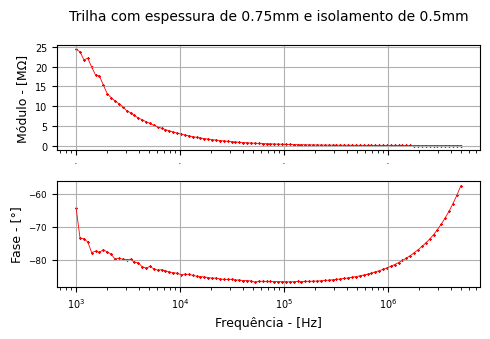

In [118]:
# Tamanho grafico
SizeX = 5
SizeY = 3.5
# Tamanho titulo
SizeTitulo = 10
# Tamanho legenda
SizeLegenda = 9
# Tamanho Eixo
SizeEixo = 7
# Tamanho do marcador
SizeMarcador = 1
# Espessura linha
linewidth_V = 0.6# Trilha 01
#
#==============#==============
plt.figure(figsize=(SizeX, SizeY))
#


plt.rcParams['xtick.labelsize'] = 0
plt.rcParams['ytick.labelsize'] = SizeEixo
plt.subplot(2, 1, 1)
plt.ylabel("Módulo - [MΩ]",size=SizeLegenda)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
#
plt.plot(I1_C0_T3['Frequencia_Hz'],I1_C0_T3['absz']/1000000,color='red', linewidth = linewidth_V)
plt.scatter(I1_C0_T3['Frequencia_Hz'],I1_C0_T3['absz']/1000000,marker='x',s=SizeMarcador ,color='red')
plt.title('Trilha com espessura de 0.75mm e isolamento de 0.5mm\n',size=SizeTitulo)
#
plt.grid(True)
plt.xscale("log") 
#plt.yscale("log") 
#
#=====FASE=====
plt.rcParams['xtick.labelsize'] = SizeEixo
plt.rcParams['ytick.labelsize'] = SizeEixo*0.9
plt.subplot(2, 1, 2)

plt.ylabel("Fase - [°]", size=SizeLegenda)
plt.xlabel("Frequência - [Hz]",size=SizeLegenda)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
#
plt.plot(I1_C0_T3['Frequencia_Hz'],I1_C0_T3['phasez_DEG'],color='red', linewidth = linewidth_V)
plt.scatter(I1_C0_T3['Frequencia_Hz'],I1_C0_T3['phasez_DEG'],marker='x',s=SizeMarcador ,color='red')
#
plt.grid(True)
plt.xscale("log") 
#==============#==============
#==============#==============
plt.tight_layout()
plt.show()

##### 
##### 2.2 Análise em grupos - range freq. 200k-5M Hz

In [16]:
R_min = 'Frequencia_Hz>=500000'
R_max = 'Frequencia_Hz<=5000000'

Freq = df_DB.query(R_min+'&'+ R_max)
Freq = Freq['Frequencia_Hz']
Freq = Freq.drop_duplicates()
Freq = Freq.sort_values(ascending=True)
Freq = Freq 

df_DB = df_DB.sort_values('Frequencia_Hz',ascending=True)

I1_C3_T3 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I1_C3_T3"' )
I1_C3_T5 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I1_C3_T5"' )
I1_C3_T7 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I1_C3_T7"' )
I1_C3_T1 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I1_C3_T1"' )
I1_C3_T9 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I1_C3_T9"' )
I2_C4_T3 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I2_C4_T3"' )
I2_C4_T5 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I2_C4_T5"' )
I2_C4_T7 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I2_C4_T7"' )
I2_C4_T1 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I2_C4_T1"' )
I1_C3_T11 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I1_C3_T11"' )
I2_C4_T9 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I2_C4_T9"' )
I3_C4_T3 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I3_C4_T3"' )
I3_C4_T5 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I3_C4_T5"' )
I3_C4_T7 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I3_C4_T7"' )
I3_C4_T1 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I3_C4_T1"' )
I2_C4_T11 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I2_C4_T11"' )
I3_C4_T9 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I3_C4_T9"' )
I3_C4_T11 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I3_C4_T11"' )
I1_C2_T3 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I1_C2_T3"' )
I1_C2_T5 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I1_C2_T5"' )
I1_C2_T7 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I1_C2_T7"' )
I1_C2_T1 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I1_C2_T1"' )
I1_C2_T9 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I1_C2_T9"' )
I2_C3_T3 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I2_C3_T3"' )
I2_C3_T5 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I2_C3_T5"' )
I2_C3_T7 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I2_C3_T7"' )
I2_C3_T1 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I2_C3_T1"' )
I1_C2_T11 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I1_C2_T11"' )
I2_C3_T9 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I2_C3_T9"' )
I3_C3_T3 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I3_C3_T3"' )
I3_C3_T5 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I3_C3_T5"' )
I3_C3_T7 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I3_C3_T7"' )
I3_C3_T1 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I3_C3_T1"' )
I2_C3_T11 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I2_C3_T11"' )
I3_C3_T9 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I3_C3_T9"' )
I3_C3_T11 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I3_C3_T11"' )
I1_C1_T3 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I1_C1_T3"' )
I1_C1_T5 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I1_C1_T5"' )
I1_C1_T7 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I1_C1_T7"' )
I1_C1_T9 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I1_C1_T9"' )
I2_C2_T3 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I2_C2_T3"' )
I2_C2_T5 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I2_C2_T5"' )
I2_C2_T7 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I2_C2_T7"' )
I2_C2_T1 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I2_C2_T1"' )
I1_C1_T11 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I1_C1_T11"' )
I2_C2_T9 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I2_C2_T9"' )
I3_C2_T3 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I3_C2_T3"' )
I3_C2_T5 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I3_C2_T5"' )
I3_C2_T7 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I3_C2_T7"' )
I3_C2_T1 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I3_C2_T1"' )
I2_C2_T11 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I2_C2_T11"' )
I3_C2_T9 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I3_C2_T9"' )
I3_C2_T11 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I3_C2_T11"' )
I4_C1_T5 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I4_C1_T5"' )
I4_C1_T3 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I4_C1_T3"' )
I4_C1_T7 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I4_C1_T7"' )
I4_C1_T1 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I4_C1_T1"' )
I4_C1_T9 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I4_C1_T9"' )
I4_C1_T11 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I4_C1_T11"' )
I2_C1_T3 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I2_C1_T3"' )
I2_C1_T5 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I2_C1_T5"' )
I2_C1_T7 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I2_C1_T7"' )
I2_C1_T1 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I2_C1_T1"' )
I2_C1_T9 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I2_C1_T9"' )
I3_C1_T3 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I3_C1_T3"' )
I3_C1_T5 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I3_C1_T5"' )
I3_C1_T7 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I3_C1_T7"' )
I3_C1_T1 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I3_C1_T1"' )
I2_C1_T11 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I2_C1_T11"' )
I3_C1_T9 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I3_C1_T9"' )
I3_C1_T11 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I3_C1_T11"' )
I1_C0_T1 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I1_C0_T1"' )
I1_C0_T11 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I1_C0_T11"' )
I1_C0_T3 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I1_C0_T3"' )
I1_C0_T5 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I1_C0_T5"' )
I1_C0_T7 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I1_C0_T7"' )
I1_C0_T9 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I1_C0_T9"' )
I2_C0_T1 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I2_C0_T1"' )
I2_C0_T11 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I2_C0_T11"' )
I2_C0_T3 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I2_C0_T3"' )
I2_C0_T5 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I2_C0_T5"' )
I2_C0_T7 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I2_C0_T7"' )
I2_C0_T9 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I2_C0_T9"' )
I3_C0_T1 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I3_C0_T1"' )
I3_C0_T11 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I3_C0_T11"' )
I3_C0_T3 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I3_C0_T3"' )
I3_C0_T5 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I3_C0_T5"' )
I3_C0_T7 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I3_C0_T7"' )
I3_C0_T9 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I3_C0_T9"' )
I4_C0_T1 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I4_C0_T1"' )
I4_C0_T11 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I4_C0_T11"' )
I4_C0_T3 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I4_C0_T3"' )
I4_C0_T5 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I4_C0_T5"' )
I4_C0_T7 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I4_C0_T7"' )
I4_C0_T9 = df_DB[['Id_Trilha','Frequencia_Hz','absz','phasez_DEG']].query(R_min+'&'+ R_max+'&'+ 'Id_Trilha=="I4_C0_T9"' )

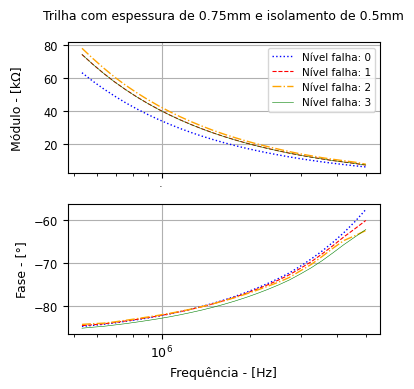

In [109]:
# Tamanho grafico
SizeX = 4
SizeY = 4
# Tamanho titulo
SizeTitulo = 9
# Tamanho legenda
SizeLegenda = 9
# Tamanho Eixo
SizeEixo = 9
# Tamanho do marcador
SizeMarcador = 2.5
# Espessura linha
linewidth_V = 1
#
#==============#==============
plt.figure(figsize=(SizeX, SizeY))
#
plt.rcParams['xtick.labelsize'] = 0
plt.rcParams['ytick.labelsize'] = SizeEixo-0.8
plt.subplot(2, 1, 1)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.ylabel("Módulo - [kΩ]\n",size=SizeLegenda)
plt.title('Trilha com espessura de 0.75mm e isolamento de 0.5mm\n',size=SizeTitulo)
#
plt.plot(Freq,I1_C0_T3['absz']/1000,':',color='blue', linewidth = linewidth_V)
plt.plot(Freq,I1_C1_T3['absz']/1000,'--',color='red', linewidth = linewidth_V*0.8)
plt.plot(Freq,I1_C2_T3['absz']/1000,'-.',color='orange', linewidth = linewidth_V)
plt.plot(Freq,I1_C3_T3['absz']/1000,'-',color='green', linewidth = linewidth_V*0.4)
#
plt.legend(['Nível falha: 0','Nível falha: 1','Nível falha: 2','Nível falha: 3'], 
           loc='upper right',fontsize=7.5) 

#plt.yscale("log") 
plt.xscale("log") 
plt.grid(True)
#
#=====FASE=====
plt.rcParams['xtick.labelsize'] = SizeEixo
plt.rcParams['ytick.labelsize'] = SizeEixo-0.7
plt.subplot(2, 1, 2)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.ylabel("Fase - [°]", size=SizeLegenda)
plt.xlabel("Frequência - [Hz]",size=SizeLegenda)
#
plt.plot(Freq,I1_C0_T3['phasez_DEG'],':',color='blue', linewidth = linewidth_V)
plt.plot(Freq,I1_C1_T3['phasez_DEG'],'--',color='red', linewidth = linewidth_V*0.8)
plt.plot(Freq,I1_C2_T3['phasez_DEG'],'-.',color='orange', linewidth = linewidth_V)
plt.plot(Freq,I1_C3_T3['phasez_DEG'],'-',color='green', linewidth = linewidth_V*0.4)
#
plt.grid(True)
plt.xscale("log") 
#==============#==============
#==============#==============
plt.tight_layout()
plt.show()

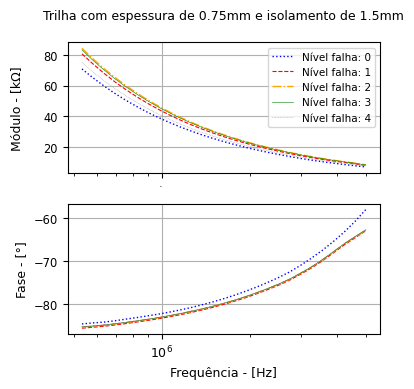

In [131]:
# Tamanho grafico
SizeX = 4
SizeY = 4
# Tamanho titulo
SizeTitulo = 9
# Tamanho legenda
SizeLegenda = 9
# Tamanho Eixo
SizeEixo = 9
# Tamanho do marcador
SizeMarcador = 2.5
# Espessura linha
linewidth_V = 1
#
#==============#==============
plt.figure(figsize=(SizeX, SizeY))
#
plt.rcParams['xtick.labelsize'] = 0
plt.rcParams['ytick.labelsize'] = SizeEixo-0.8
plt.subplot(2, 1, 1)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.ylabel("Módulo - [kΩ]\n",size=SizeLegenda)
plt.title('Trilha com espessura de 0.75mm e isolamento de 1.5mm\n',size=SizeTitulo)
#
plt.plot(Freq,I3_C0_T3['absz']/1000,':',color='blue', linewidth = linewidth_V)
plt.plot(Freq,I3_C1_T3['absz']/1000,'--',color='red', linewidth = linewidth_V*0.8)
plt.plot(Freq,I3_C2_T3['absz']/1000,'-.',color='orange', linewidth = linewidth_V)
plt.plot(Freq,I3_C3_T3['absz']/1000,'-',color='green', linewidth = linewidth_V*0.4)
plt.plot(Freq,I3_C4_T3['absz']/1000,':',color='gray', linewidth = linewidth_V*0.4)

#
plt.legend(['Nível falha: 0','Nível falha: 1','Nível falha: 2','Nível falha: 3','Nível falha: 4'], 
           loc='upper right',fontsize=7.5) 
#plt.yscale("log") 
plt.xscale("log") 
plt.grid(True)
#
#=====FASE=====
plt.rcParams['xtick.labelsize'] = SizeEixo
plt.rcParams['ytick.labelsize'] = SizeEixo-0.7
plt.subplot(2, 1, 2)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.ylabel("Fase - [°]", size=SizeLegenda)
plt.xlabel("Frequência - [Hz]",size=SizeLegenda)
#
plt.plot(Freq,I3_C0_T3['phasez_DEG'],':',color='blue', linewidth = linewidth_V)
plt.plot(Freq,I3_C1_T3['phasez_DEG'],'--',color='red', linewidth = linewidth_V*0.8)
plt.plot(Freq,I3_C2_T3['phasez_DEG'],'-.',color='orange', linewidth = linewidth_V)
plt.plot(Freq,I3_C3_T3['phasez_DEG'],'-',color='green', linewidth = linewidth_V*0.4)
plt.plot(Freq,I3_C4_T3['phasez_DEG'],'-',color='gray', linewidth = linewidth_V*0.4)
#
plt.grid(True)
plt.xscale("log") 
#==============#==============
#==============#==============
plt.tight_layout()
plt.show()

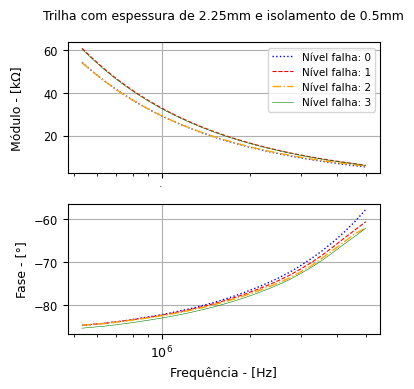

In [128]:
# Tamanho grafico
SizeX = 4
SizeY = 4
# Tamanho titulo
SizeTitulo = 9
# Tamanho legenda
SizeLegenda = 9
# Tamanho Eixo
SizeEixo = 9
# Tamanho do marcador
SizeMarcador = 2.5
# Espessura linha
linewidth_V = 1
#
#==============#==============
plt.figure(figsize=(SizeX, SizeY))
#
plt.rcParams['xtick.labelsize'] = 0
plt.rcParams['ytick.labelsize'] = SizeEixo-0.8
plt.subplot(2, 1, 1)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.ylabel("Módulo - [kΩ]\n",size=SizeLegenda)
plt.title('Trilha com espessura de 2.25mm e isolamento de 0.5mm\n',size=SizeTitulo)
#
plt.plot(Freq,I1_C0_T9['absz']/1000,':',color='blue', linewidth = linewidth_V)
plt.plot(Freq,I1_C1_T9['absz']/1000,'--',color='red', linewidth = linewidth_V*0.8)
plt.plot(Freq,I1_C2_T9['absz']/1000,'-.',color='orange', linewidth = linewidth_V)
plt.plot(Freq,I1_C3_T9['absz']/1000,'-',color='green', linewidth = linewidth_V*0.4)

#
plt.legend(['Nível falha: 0','Nível falha: 1','Nível falha: 2','Nível falha: 3'], 
           loc='upper right',fontsize=7.5) 

#plt.yscale("log") 
plt.xscale("log") 
plt.grid(True)
#
#=====FASE=====
plt.rcParams['xtick.labelsize'] = SizeEixo
plt.rcParams['ytick.labelsize'] = SizeEixo-0.7
plt.subplot(2, 1, 2)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.ylabel("Fase - [°]", size=SizeLegenda)
plt.xlabel("Frequência - [Hz]",size=SizeLegenda)
#
plt.plot(Freq,I1_C0_T9['phasez_DEG'],':',color='blue', linewidth = linewidth_V)
plt.plot(Freq,I1_C1_T9['phasez_DEG'],'--',color='red', linewidth = linewidth_V*0.8)
plt.plot(Freq,I1_C2_T9['phasez_DEG'],'-.',color='orange', linewidth = linewidth_V)
plt.plot(Freq,I1_C3_T9['phasez_DEG'],'-',color='green', linewidth = linewidth_V*0.4)


#
plt.grid(True)
plt.xscale("log") 
#==============#==============
#==============#==============
plt.tight_layout()
plt.show()

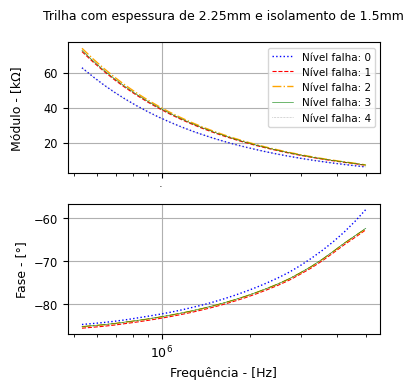

In [121]:
# Tamanho grafico
SizeX = 4
SizeY = 4
# Tamanho titulo
SizeTitulo = 9
# Tamanho legenda
SizeLegenda = 9
# Tamanho Eixo
SizeEixo = 9
# Tamanho do marcador
SizeMarcador = 2.5
# Espessura linha
linewidth_V = 1
#
#==============#==============
plt.figure(figsize=(SizeX, SizeY))
#
plt.rcParams['xtick.labelsize'] = 0
plt.rcParams['ytick.labelsize'] = SizeEixo-0.8
plt.subplot(2, 1, 1)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.ylabel("Módulo - [kΩ]\n",size=SizeLegenda)
plt.title('Trilha com espessura de 2.25mm e isolamento de 1.5mm\n',size=SizeTitulo)
#
plt.plot(Freq,I3_C0_T9['absz']/1000,':',color='blue', linewidth = linewidth_V)
plt.plot(Freq,I3_C1_T9['absz']/1000,'--',color='red', linewidth = linewidth_V*0.8)
plt.plot(Freq,I3_C2_T9['absz']/1000,'-.',color='orange', linewidth = linewidth_V)
plt.plot(Freq,I3_C3_T9['absz']/1000,'-',color='green', linewidth = linewidth_V*0.4)
plt.plot(Freq,I3_C4_T9['absz']/1000,':',color='gray', linewidth = linewidth_V*0.4)
#
plt.legend(['Nível falha: 0','Nível falha: 1','Nível falha: 2','Nível falha: 3','Nível falha: 4'], 
           loc='upper right',fontsize=7.5) 

#plt.yscale("log") 
plt.xscale("log") 
plt.grid(True)
#
#=====FASE=====
plt.rcParams['xtick.labelsize'] = SizeEixo
plt.rcParams['ytick.labelsize'] = SizeEixo-0.7
plt.subplot(2, 1, 2)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.ylabel("Fase - [°]", size=SizeLegenda)
plt.xlabel("Frequência - [Hz]",size=SizeLegenda)
#
plt.plot(Freq,I3_C0_T9['phasez_DEG'],':',color='blue', linewidth = linewidth_V)
plt.plot(Freq,I3_C1_T9['phasez_DEG'],'--',color='red', linewidth = linewidth_V*0.8)
plt.plot(Freq,I3_C2_T9['phasez_DEG'],'-.',color='orange', linewidth = linewidth_V)
plt.plot(Freq,I3_C3_T9['phasez_DEG'],'-',color='green', linewidth = linewidth_V*0.4)
plt.plot(Freq,I3_C4_T9['phasez_DEG'],':',color='gray', linewidth = linewidth_V*0.4)
#
plt.grid(True)
plt.xscale("log") 
#==============#==============
#==============#==============
plt.tight_layout()
plt.show()